# INSPECCION DE DATOS

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Cargar datos CSV
csv_path='KRvideos_cc50_202101.csv'
df = pd.read_csv(csv_path)

# Cargar categorías desde JSON
with open('KR_category_id.json', 'r') as f:
    categories = json.load(f)

print(df.head())
print(df.info())
print(df.describe())
print(df['category_id'].value_counts(dropna=False))



      video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0      17.14.11            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U      17.14.11  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80      17.14.11  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI      17.14.11     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id     publish_time  \
0         22.0  13/11/2017 2:07   
1         25.0  13/11/2017 5:59   
2         22.0  11/11/2017 2:16   
3         25.0  12/11/2017 6:19   
4         25.0  13/11/2017 6:08   

                                                tags     views   likes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130.0  1422.0   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533.0   211.0   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"|"공연"  421409.0  5112.0   
3  이명박|"이명박 출국금지"|"이명박 출국현장"|"이명박 바레인"|"이명박 대통령"

### 1. Unificacion de archivos

In [3]:
categories_list = []
for item in categories['items']:
    categories_list.append({
        'category_id': int(item['id']),
        'category_name': item['snippet']['title']
    })

categories_df = pd.DataFrame(categories_list)

df = df.dropna(subset=['category_id'])
df['category_id'] = df['category_id'].astype(int)

df = df.merge(categories_df, on='category_id', how='left')
print(df.head())

      video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0      17.14.11            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U      17.14.11  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80      17.14.11  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI      17.14.11     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id     publish_time  \
0           22  13/11/2017 2:07   
1           25  13/11/2017 5:59   
2           22  11/11/2017 2:16   
3           25  12/11/2017 6:19   
4           25  13/11/2017 6:08   

                                                tags     views   likes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130.0  1422.0   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533.0   211.0   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"|"공연"  421409.0  5112.0   
3  이명박|"이명박 출국금지"|"이명박 출국현장"|"이명박 바레인"|"이명박 대통령"

# Visualizacion de datos

### 1. Visualizar cantidad de valores nulos por columna

Resumen de valores nulos por columna:
                        Nulos   % Nulos
video_id                    0  0.000000
trending_date               0  0.000000
title                       0  0.000000
channel_title               0  0.000000
category_id                 0  0.000000
publish_time                0  0.000000
tags                        0  0.000000
views                       0  0.000000
likes                       0  0.000000
dislikes                    0  0.000000
comment_count               0  0.000000
thumbnail_link              0  0.000000
comments_disabled           0  0.000000
ratings_disabled            0  0.000000
video_error_or_removed      0  0.000000
description              3163  9.150346
state                       0  0.000000
lat                         0  0.000000
lon                         0  0.000000
geometry                    0  0.000000
category_name             288  0.833165


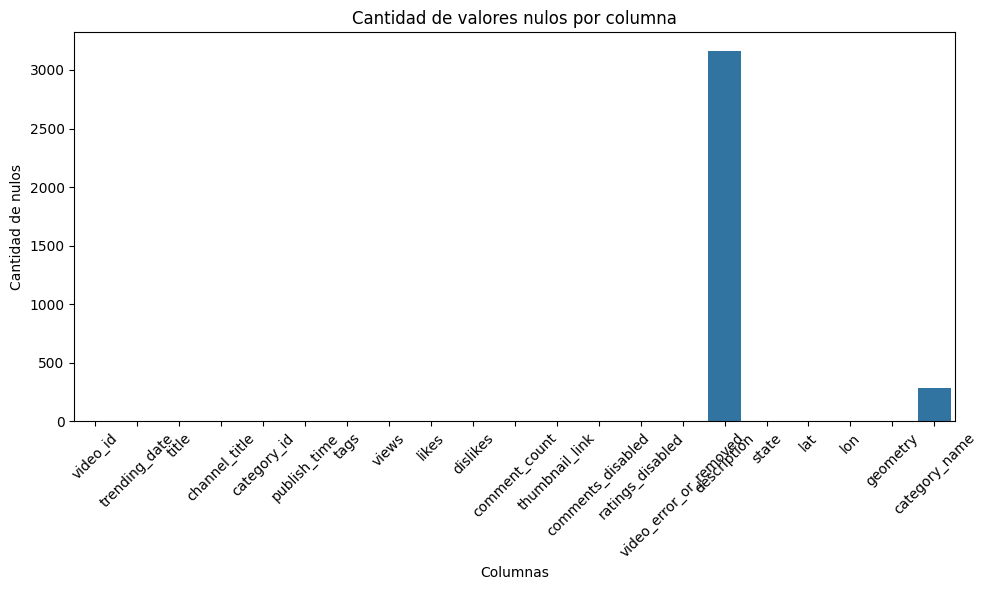

In [4]:
nulos = df.isnull().sum()
nulos_percent = (nulos / len(df)) * 100
nulos_df = pd.DataFrame({'Nulos': nulos, '% Nulos': nulos_percent})

print("Resumen de valores nulos por columna:")
print(nulos_df)

# Gráfico de barras para visualizar nulos
plt.figure(figsize=(10,6))
sns.barplot(x=nulos_df.index, y='Nulos', data=nulos_df)
plt.xticks(rotation=45)
plt.title('Cantidad de valores nulos por columna')
plt.ylabel('Cantidad de nulos')
plt.xlabel('Columnas')
plt.tight_layout()
plt.show()

### 2. Tabla resumen de estadísticas para columnas numéricas

In [5]:
print("Primeras filas de 'category_id' y 'category_name':")
print(df[['category_id', 'category_name']].head())

Primeras filas de 'category_id' y 'category_name':
   category_id    category_name
0           22   People & Blogs
1           25  News & Politics
2           22   People & Blogs
3           25  News & Politics
4           25  News & Politics


### 3. Verificar que no hayan valores negativos en: (likes, dislikes, views)


In [6]:
#verificamos si hay negativos debido a que como no deberian haber negativos, esto seria un error
cols_num = ['views', 'likes', 'dislikes']
for col in cols_num:
    fuera_rango = df[df[col] < 0]
    if len(fuera_rango) > 0:
        print(f"Valores fuera de rango encontrados en '{col}':")
        print(fuera_rango[[col]])
    else:
        print(f"No se encontraron valores fuera de rango en '{col}'.")

No se encontraron valores fuera de rango en 'views'.
No se encontraron valores fuera de rango en 'likes'.
No se encontraron valores fuera de rango en 'dislikes'.


### 4. Visualización de la cantidad de videos por categoría

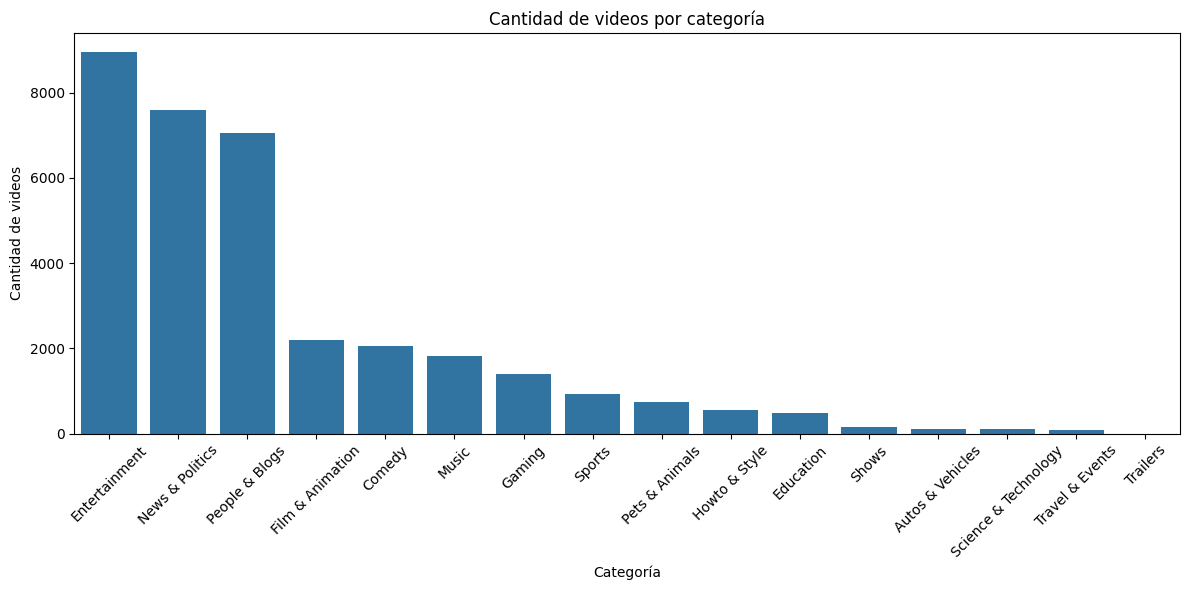

Cantidad de videos por categoría:
category_name
Entertainment           8955
News & Politics         7582
People & Blogs          7056
Film & Animation        2200
Comedy                  2056
Music                   1825
Gaming                  1392
Sports                   936
Pets & Animals           735
Howto & Style            558
Education                486
Shows                    165
Autos & Vehicles         120
Science & Technology     115
Travel & Events           96
Trailers                   2
Name: count, dtype: int64


In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category_name', order=df['category_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de videos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de videos')
plt.tight_layout()
plt.show()

#Tabla de conteo para el grafico
category_counts = df['category_name'].value_counts()
print("Cantidad de videos por categoría:")
print(category_counts)



### 5. Distribución de videos por estado

                 state  count
0                Ulsan   2378
1     Gyeongsangnam Do   2375
2                Busan   2349
3     Taegu Gwangyoksi   2344
4         Jeollabuk Do   2340
5           Gangwon Do   2328
6                 Jeju   2317
7               Seoul    2295
8              Daejeon   2287
9    Chungcheongbuk Do   2276
10  Kwangju Gwangyoksi   2271
11         Gyeonggi Do   2270
12             Gwangju   2262
13  Inch'on Gwangyoksi   2243
14               Daegu   2232


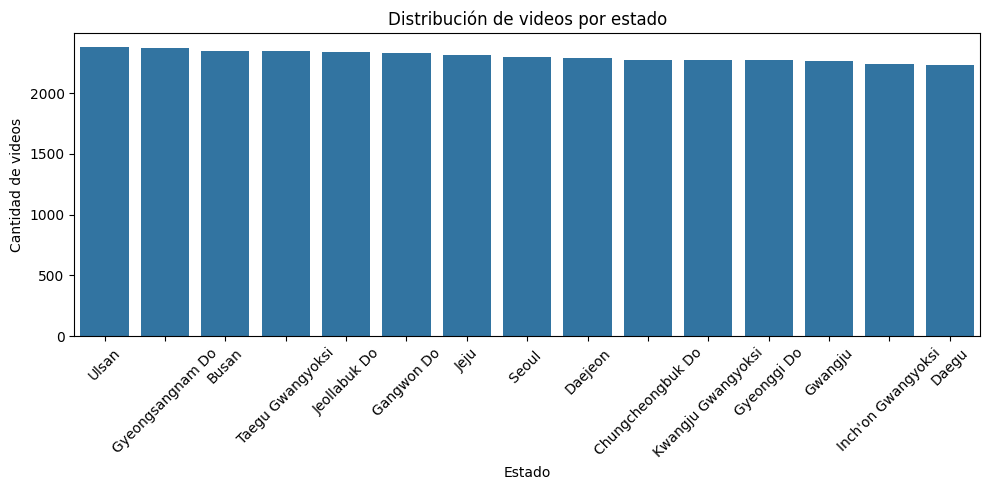

In [8]:
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

print(state_counts)

plt.figure(figsize=(10,5))
sns.barplot(data=state_counts, x='state', y='count')
plt.title('Distribución de videos por estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6. Distribución de videos por estado 

  comments_disabled  count
0             FALSO  34056
1         VERDADERO    511


C:\Users\paite\AppData\Local\Temp\ipykernel_4240\1291010831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comments_disabled_counts, x='comments_disabled', y='count', palette='pastel')


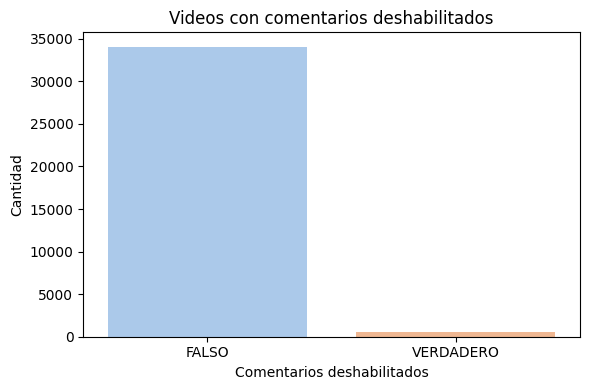

In [9]:
# Tabla de frecuencia
comments_disabled_counts = df['comments_disabled'].value_counts().reset_index()
comments_disabled_counts.columns = ['comments_disabled', 'count']

print(comments_disabled_counts)

# Gráfico
plt.figure(figsize=(6,4))
sns.barplot(data=comments_disabled_counts, x='comments_disabled', y='count', palette='pastel')
plt.title('Videos con comentarios deshabilitados')
plt.xlabel('Comentarios deshabilitados')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### Los 5 canales los cuales son tendencia y 5 que estan con menos frecuencia

C:\Users\paite\AppData\Local\Temp\ipykernel_4240\3674372352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x='cantidad_videos_tendencia', y='channel_title', palette='Greens_d')


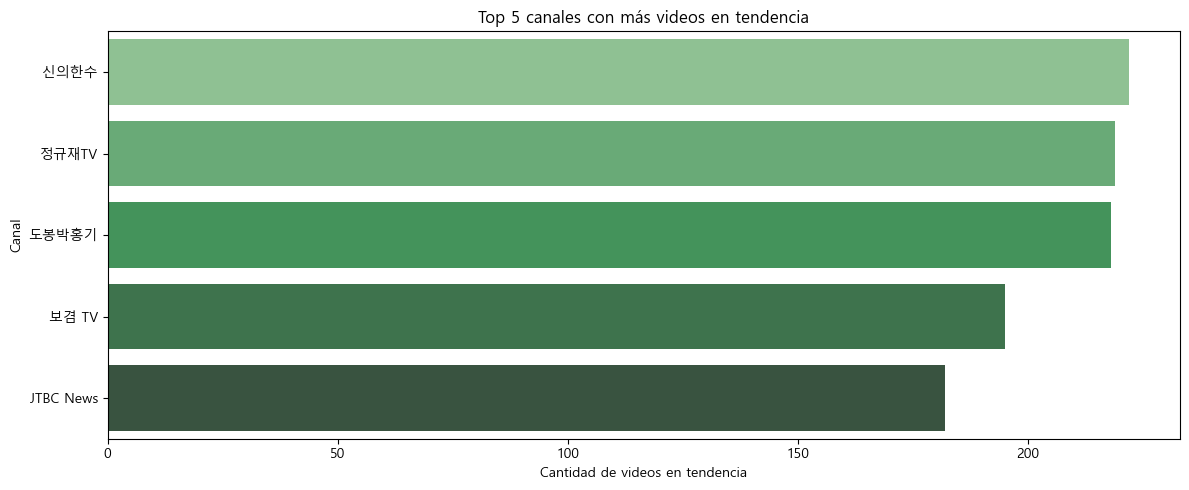

C:\Users\paite\AppData\Local\Temp\ipykernel_4240\3674372352.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_5, x='cantidad_videos_tendencia', y='channel_title', palette='Reds_d')


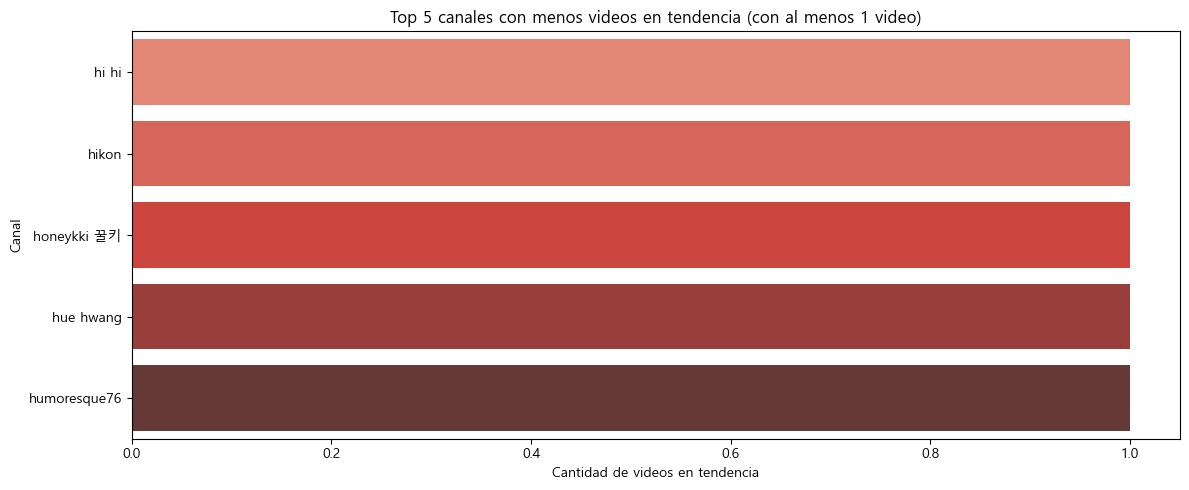

In [10]:
plt.rcParams['font.family'] = 'Malgun Gothic'

videos_por_canal = df.groupby('channel_title').size().reset_index(name='cantidad_videos_tendencia')
top_5 = videos_por_canal.sort_values(by='cantidad_videos_tendencia', ascending=False).head(5)

bottom_5 = videos_por_canal[videos_por_canal['cantidad_videos_tendencia'] > 0].sort_values(by='cantidad_videos_tendencia').head(5)

#Gráfico Top 5
plt.figure(figsize=(12,5))
sns.barplot(data=top_5, x='cantidad_videos_tendencia', y='channel_title', palette='Greens_d')
plt.title('Top 5 canales con más videos en tendencia')
plt.xlabel('Cantidad de videos en tendencia')
plt.ylabel('Canal')
plt.tight_layout()
plt.show()

#Gráfico Bottom 5
plt.figure(figsize=(12,5))
sns.barplot(data=bottom_5, x='cantidad_videos_tendencia', y='channel_title', palette='Reds_d')
plt.title('Top 5 canales con menos videos en tendencia (con al menos 1 video)')
plt.xlabel('Cantidad de videos en tendencia')
plt.ylabel('Canal')
plt.tight_layout()
plt.show()

# Limpieza de datos

### 1. Evaluación de duplicados y nulos

In [11]:
df_out = df.copy()
df_num = df.select_dtypes(include='number')

categoricas = df.select_dtypes(include=['object'])

In [12]:
df_num.describe()

,category_id,views,likes,dislikes,comment_count,lat,lon
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04,34567.000000,34567.000000
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03,35.989816,127.768105
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04,1.136712,0.939118
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00,33.510137,126.521931
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02,35.170966,126.910434
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02,35.866789,127.689715
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02,37.348068,128.606971
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06,37.566349,129.316954


In [13]:
categoricas.describe()

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,geometry,category_name
count,34567,34567,34567,34567,34567,34567,34567,34567,34567,34567,31404,34567,34567,34279
unique,15876,205,16353,4043,14548,10791,16089,2,2,2,12890,15,15,16
top,#NAME?,18.20.05,브베 실시간 스트리밍,신의한수,29/01/2018 4:00,[none],https://i.ytimg.com/vi/AKDuAzSwaPI/default.jpg,FALSO,FALSO,FALSO,설명,Ulsan,POINT (129.3169539 35.54673077),Entertainment
freq,443,200,20,222,25,7183,10,34056,33167,34526,150,2378,2378,8955


### 2. Mapa de calor de valores faltantes en variables

In [14]:
df.isin(["", "NA", "[none]"]).sum()
df.replace(["", "NA", "[none]"], np.nan, inplace=True)

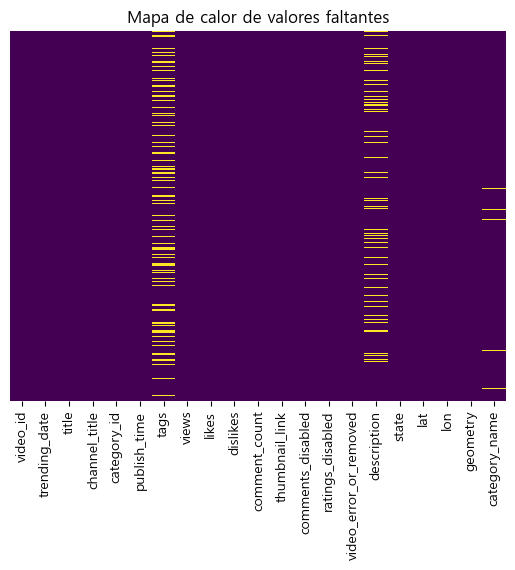

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

### 3. Ver la cantidad de duplicados

In [16]:
print(df.duplicated().sum())

167


### 3.1 Imputar los duplicados

In [17]:
df = df.drop_duplicates()

### 4. Función para mostrar % de nulos

In [18]:
def fx_porc_missings(data, only_missings = False):
    df_vars_missings = pd.concat([
        pd.DataFrame(data.isnull().sum(), columns = ['n_nulos']),
        pd.DataFrame(100*data.isnull().sum()/len(data), columns = ['%Total'])
    ], axis=1)
    if only_missings:
        return df_vars_missings[df_vars_missings["n_nulos"] != 0]
    else:
        return df_vars_missings

### 4.1 Mostrando nulos

In [19]:
fx_porc_missings(df, only_missings=True)

,n_nulos,%Total
tags,7141,20.758721
description,3148,9.151163
category_name,286,0.831395


In [20]:
fx_porc_missings(categoricas, only_missings=True)

,n_nulos,%Total
description,3163,9.150346
category_name,288,0.833165


In [21]:
fx_porc_missings(df_num, only_missings=True)

,n_nulos,%Total


### 5.  Conversión de fechas y antigüedad del video

In [22]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['days_to_trending'] = (df['trending_date'] - df['publish_time']).dt.days


C:\Users\paite\AppData\Local\Temp\ipykernel_4240\3622738478.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
C:\Users\paite\AppData\Local\Temp\ipykernel_4240\3622738478.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')


### 6. Validación de lógica de registros

In [23]:
# Eliminar registros sin fechas válidas
#df = df.dropna(subset=['publish_time', 'trending_date'])
df = df[df['likes'] <= df['views']]

### 7.  Tratamiento de valores nulos

In [24]:
# Imputar nulos
df['tags'] = df['tags'].fillna("Sin etiquetas")
df['comment_count'] = df['comment_count'].fillna(df['comment_count'].median())
df['views'] = df['views'].fillna(df['views'].median())
df['category_name'] = df['category_name'].fillna(df['category_name'].mode()[0])


### 8. Detección de tratamiento outliers

In [25]:
def marcar_outliers(col):
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    return (df[col] < lim_inf) | (df[col] > lim_sup)

for col in df_num.columns:
    flag_col = f"outlier_{col}"
    df_out[flag_col] = marcar_outliers(col)

# Cuántos outliers hay por columna
df_out.filter(like='outlier_').sum()

outlier_category_id      5953
outlier_views            3784
outlier_likes            3520
outlier_dislikes         3921
outlier_comment_count    3601
outlier_lat                 0
outlier_lon                 0
dtype: object

In [26]:
df['views'].sort_values(ascending=False).head(10)
Q1 = df['views'].quantile(0.25)
Q3 = df['views'].quantile(0.75)
IQR = Q3 - Q1
lim_sup = Q3 + 1.5 * IQR
df[df['views'] > lim_sup].describe()


,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,lat,lon,days_to_trending
count,1400,3784.000000,3784,3.784000e+03,3.784000e+03,3.784000e+03,3.784000e+03,3784.000000,3784.000000,1400.000000
mean,2005-02-05 22:16:06.857142784,18.516649,2018-02-27 09:00:06.279069952,2.701941e+06,9.162198e+04,4.039756e+03,1.339532e+04,35.969745,127.790015,-4779.689286
min,2001-01-18 00:00:00,1.000000,2016-02-12 16:56:00,6.256650e+05,0.000000e+00,0.000000e+00,0.000000e+00,33.510137,126.521931,-6192.000000
25%,2002-10-18 00:00:00,10.000000,2018-01-10 10:54:45,8.027570e+05,4.328250e+03,3.370000e+02,1.205000e+03,35.170966,126.910434,-5591.250000
50%,2004-05-18 00:00:00,22.000000,2018-02-25 06:29:30,1.098268e+06,1.089850e+04,6.300000e+02,2.428000e+03,35.866789,127.689715,-5066.500000
75%,2006-03-18 00:00:00,24.000000,2018-04-27 01:05:00,1.860784e+06,3.146450e+04,1.369000e+03,6.215500e+03,37.348068,128.606971,-4458.000000
max,2012-12-17 00:00:00,43.000000,2018-06-13 14:29:00,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06,37.566349,129.316954,-1816.000000
std,NaN,7.799004,NaN,6.924240e+06,3.433824e+05,4.126715e+04,6.370818e+04,1.125633,0.946316,1155.962230


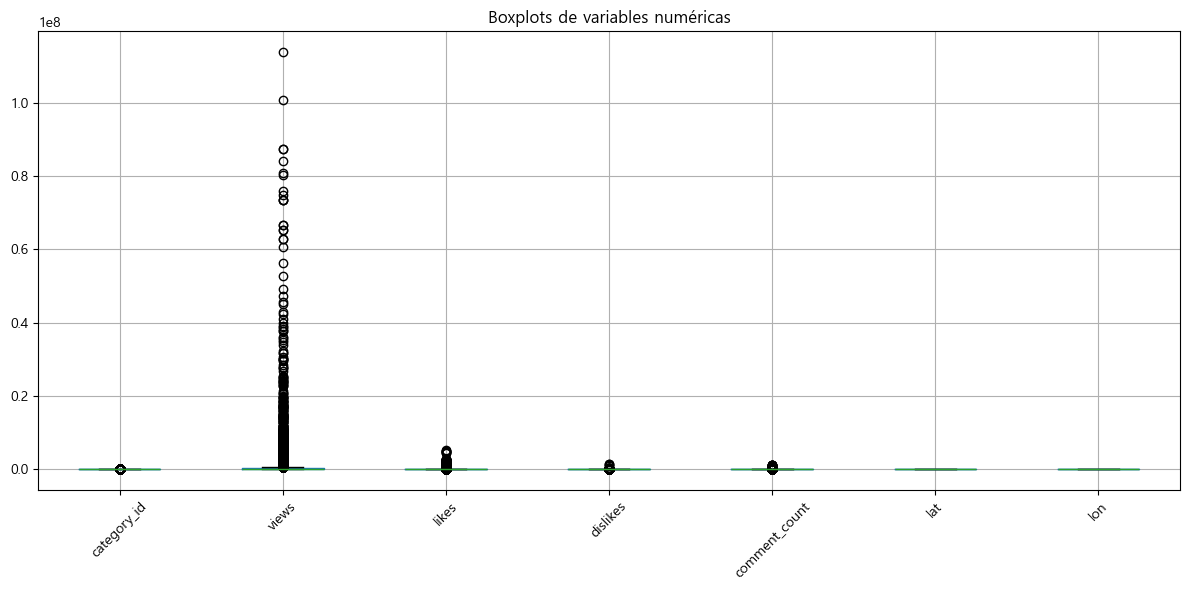

In [27]:
plt.figure(figsize=(12, 6))
df_num.boxplot()
plt.title("Boxplots de variables numéricas")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 9. Windorización de datos outliers

In [28]:
for col in df_num.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lim_inf, upper=lim_sup)

### 10. Normalización de variables numéricas

In [31]:
num_cols = ['views', 'likes', 'dislikes', 'comment_count', 'days_to_trending']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])


### 11. Codificación de variables categóricas

In [32]:
cat_cols = ['category_name', 'channel_title', 'state']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_scaled[col + '_encoded'] = le.fit_transform(df_scaled[col])
    encoders[col] = le

df_scaled[[col + '_encoded' for col in cat_cols]].head()

,category_name_encoded,channel_title_encoded,state_encoded
0,9,2526,13
1,8,419,3
2,9,2279,1
3,8,2702,11
4,8,1068,1


In [33]:
df_scaled.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,description,state,lat,lon,geometry,category_name,days_to_trending,category_name_encoded,channel_title_encoded,state_encoded
0,RxGQe4EeEpA,NaT,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22.0,2017-11-13 02:07:00,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",-0.205574,-0.403529,-0.611857,...,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,Taegu Gwangyoksi,35.866789,128.606971,POINT (128.6069714 35.86678876),People & Blogs,NaN,9,2526,13
1,hH7wVE8OlQ0,NaT,JSA 귀순 북한군 총격 부상,Edward,25.0,2017-11-13 05:59:00,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",-0.606116,-0.840573,-0.701826,...,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...,Daejeon,36.335546,127.425028,POINT (127.425028 36.33554567),News & Politics,NaN,8,419,3
2,9V8bnWUmE9U,NaT,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22.0,2017-11-11 02:16:00,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",1.129342,0.928175,0.332816,...,퍼가실때 꼭 출처 부탁드려요,Chungcheongbuk Do,36.935251,127.689715,POINT (127.6897147 36.93525067),People & Blogs,NaN,9,2279,1
3,0_8py-t5R80,NaT,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25.0,2017-11-12 06:19:00,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",0.130169,-0.161368,0.385298,...,다스는 누구겁니까 듣고 난 후 표정,Kwangju Gwangyoksi,35.170966,126.910434,POINT (126.9104341 35.1709656),News & Politics,NaN,8,2702,11
4,bk55RbxiQdI,NaT,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25.0,2017-11-13 06:08:00,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",-0.566196,-0.521902,-0.094536,...,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...,Chungcheongbuk Do,36.935251,127.689715,POINT (127.6897147 36.93525067),News & Politics,NaN,8,1068,1


In [34]:
df['days_to_trending'].isnull().sum()


np.int64(21487)

### 12. Crear variables derivadas

In [35]:
df['likes_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)
df['comment_ratio'] = df['comment_count'] / (df['views'] + 1)

### 13. Eliminar columnas irrelevantes (falta determinar cuales se borraran, estas que estan acá creo que podrían ser)

In [ ]:
#df.drop(['video_error_or_removed', 'thumbnail_link'], axis=1, inplace=True)

### 14. Exportar el dataset limpio

In [36]:
df.to_csv("KRvideos_limpio.csv", index=False)

### 15. Análisis visual posterior a limpieza 

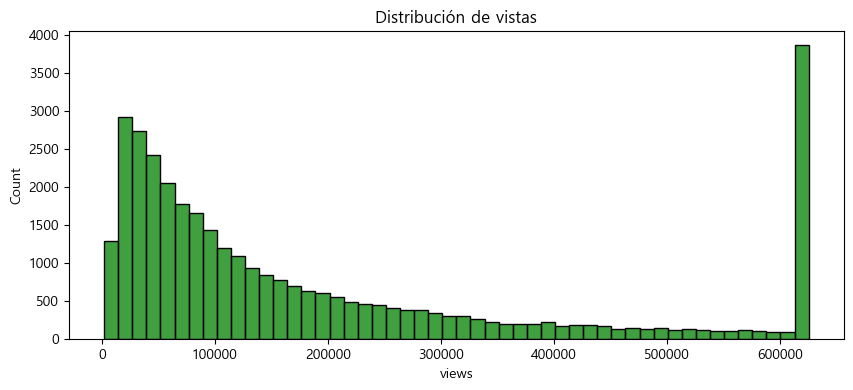

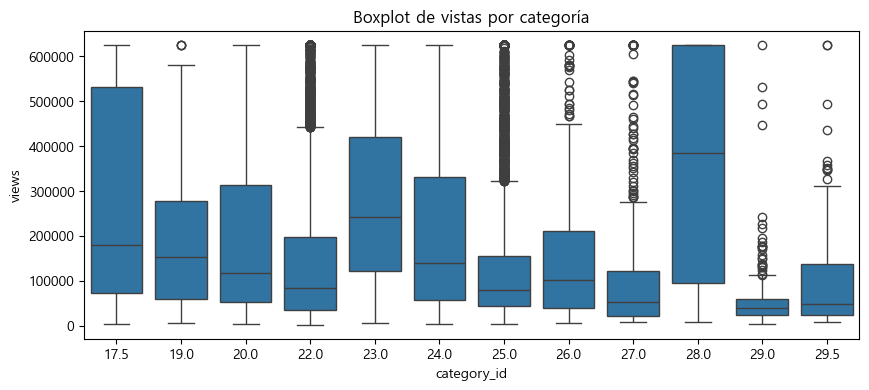

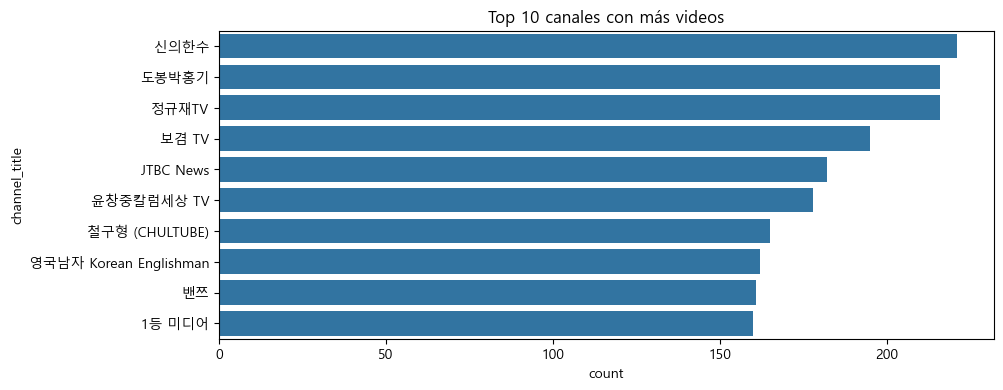

In [38]:
plt.figure(figsize=(10, 4))
sns.histplot(df['views'], bins=50, color='green')
plt.title("Distribución de vistas")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='category_id', y='views', data=df)
plt.title("Boxplot de vistas por categoría")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(y='channel_title', data=df, order=df['channel_title'].value_counts().head(10).index)
plt.title("Top 10 canales con más videos")
plt.show()


In [39]:
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
video_id                      0
trending_date             21487
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description                3148
state                         0
lat                           0
lon                           0
geometry                      0
category_name                 0
days_to_trending          21487
likes_ratio                   0
comment_ratio                 0
dtype: int64


In [40]:
# Mostrar cantidad de valores nulos solo en columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
print("Valores nulos en variables numéricas:")
print(df[num_cols].isnull().sum())

Valores nulos en variables numéricas:
category_id             0
views                   0
likes                   0
dislikes                0
comment_count           0
lat                     0
lon                     0
days_to_trending    21487
likes_ratio             0
comment_ratio           0
dtype: int64


# Entrenamiento del Regresión Lineal para predecir Vistas

### 1. Generamos la matriz de correlacion y el heatmap

<Axes: >

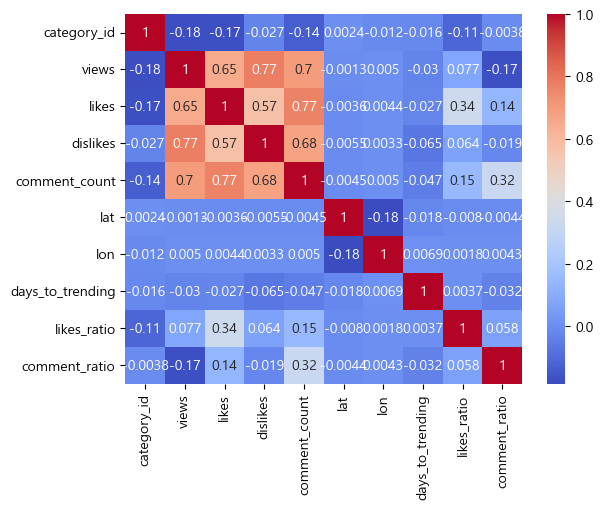

In [41]:
df_numeric=df.select_dtypes(include=['number'])
corr_matrix=df_numeric.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

In [42]:
category_count = df['category_id'].value_counts()
print("Frequency table for Sector:")
print(category_count)

Frequency table for Sector:
category_id
24.0    8923
25.0    7532
22.0    7023
17.5    5786
23.0    2045
20.0    1387
26.0     557
27.0     484
29.0     286
29.5     167
28.0     114
19.0      96
Name: count, dtype: int64


### 2. Mostramos los graficos de dispersión

### 2.1 Grafico likes - views

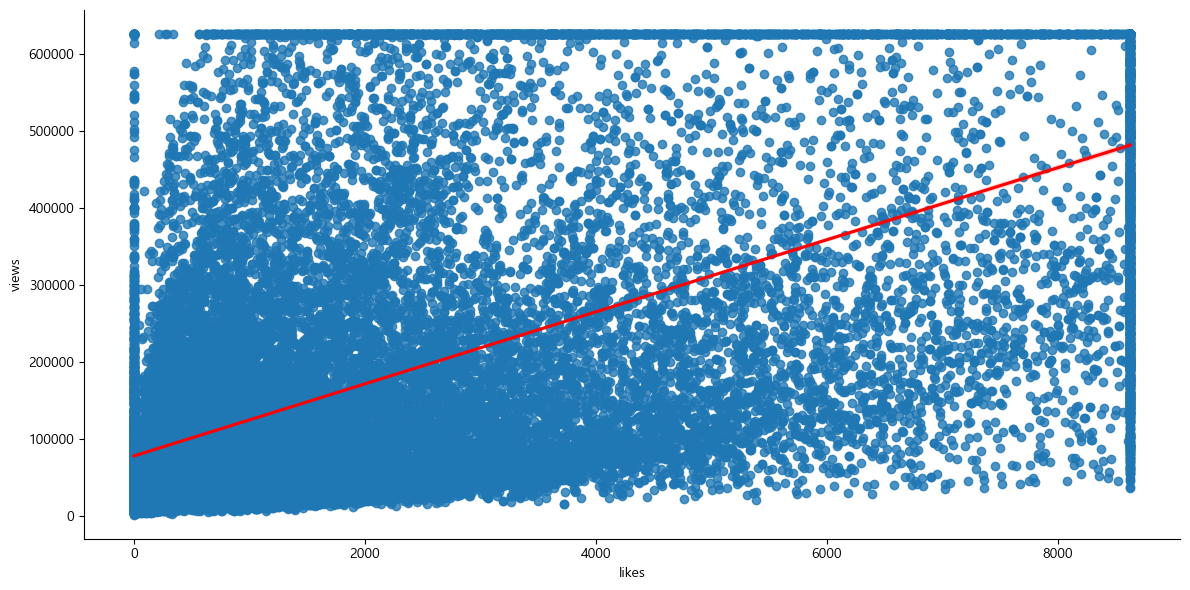

In [43]:
sns.lmplot(data=df,x='likes',y='views',height=6,aspect=2,line_kws={'color': 'red'})

### 2.2 Grafico dislikes - views

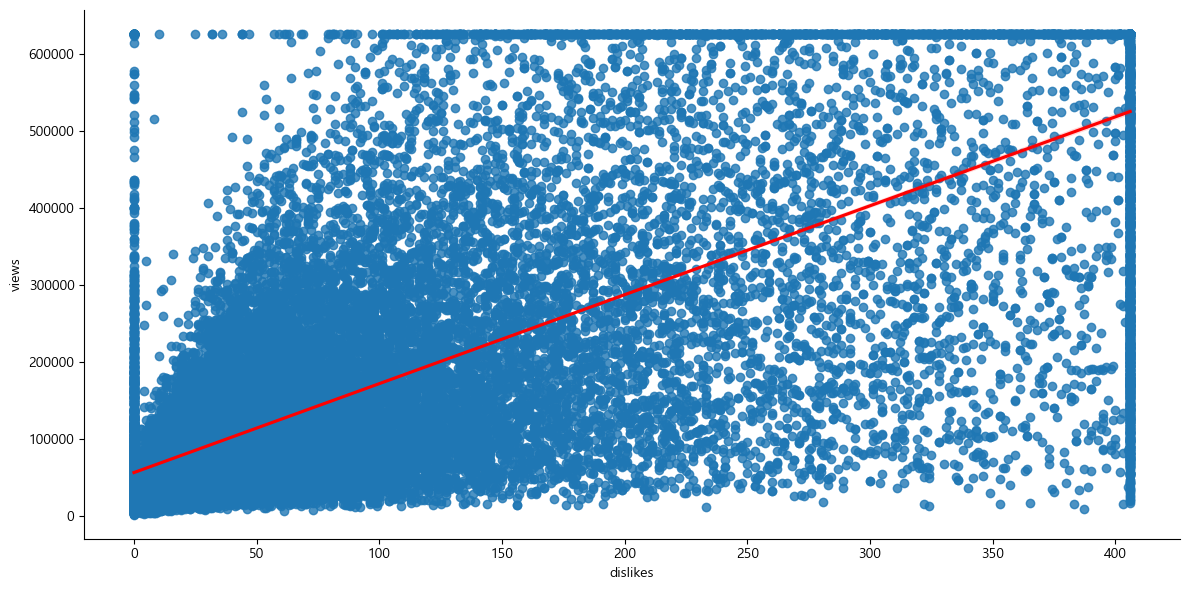

In [45]:
sns.lmplot(data=df,x='dislikes',y='views',height=6,aspect=2,line_kws={'color': 'red'})

### 2.3 Grafico comment_count - views

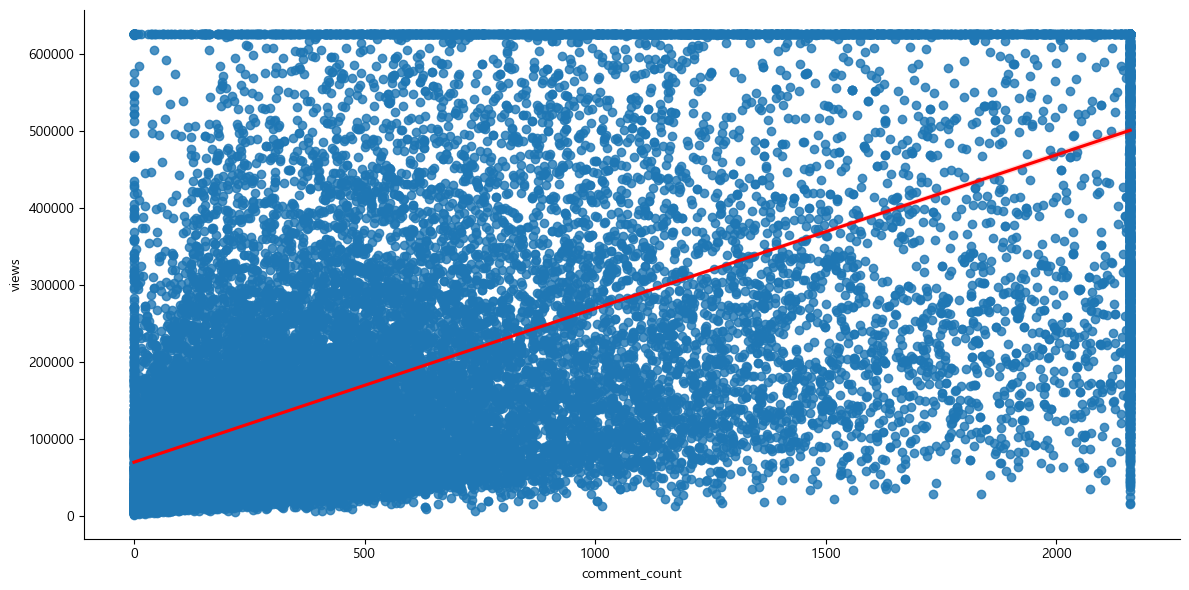

In [46]:
sns.lmplot(data=df,x='comment_count',y='views',height=6,aspect=2,line_kws={'color': 'red'})

### 2.4 Grafico comment-ratio - views

c:\Users\paite\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  self._figure.tight_layout(*args, **kwargs)


(0.0, 698881.2317136726)

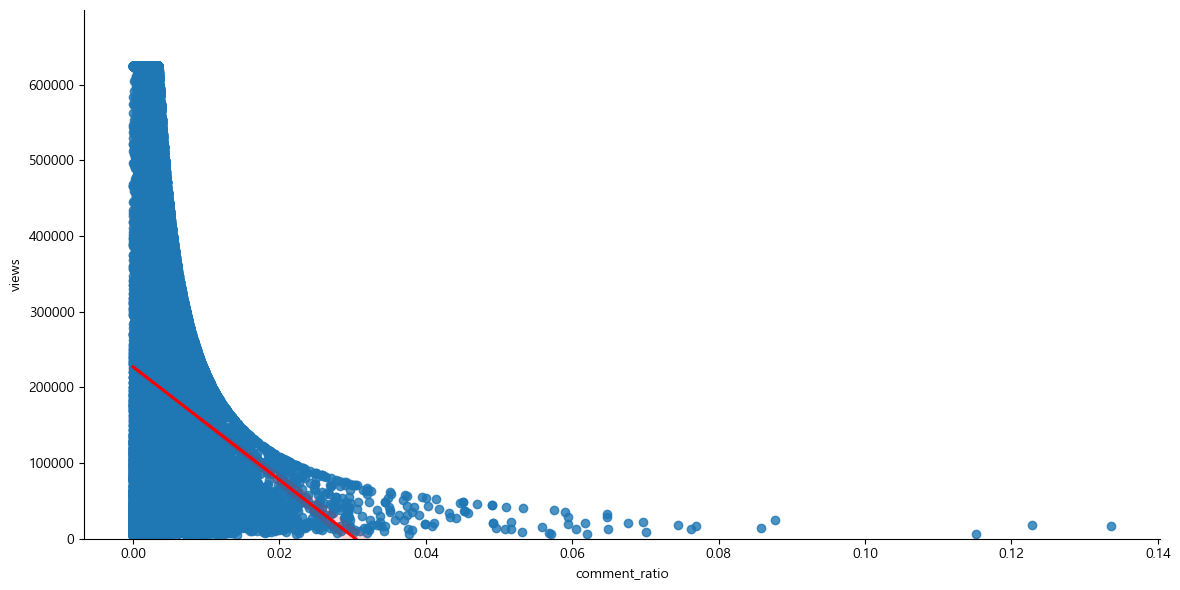

In [47]:
sns.lmplot(data=df,x='comment_ratio',y='views',height=6,aspect=2,line_kws={'color': 'red'})
plt.ylim(bottom=0)

### 2.5 Grafico likes-ratio - views

(0.0, 656688.64375)

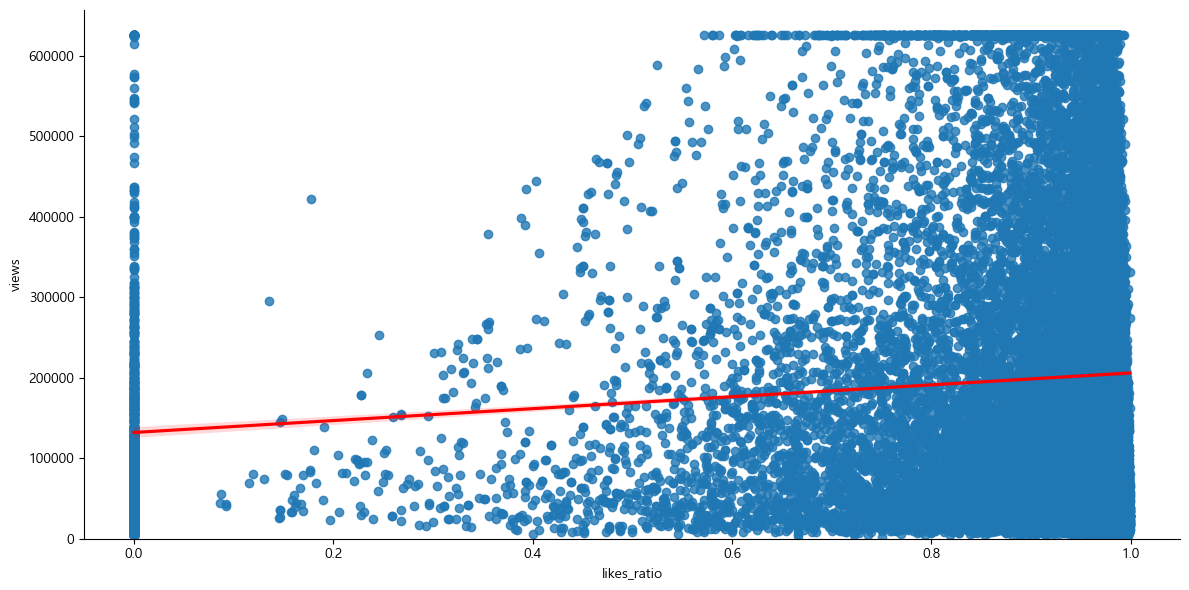

In [48]:
sns.lmplot(data=df,x='likes_ratio',y='views',height=6,aspect=2,line_kws={'color': 'red'})
plt.ylim(bottom=0)

In [59]:
# Tabla de frecuencia para la variable 'Sector'
category_counts = df['category_name'].value_counts()
print("Frequency table for Sector:")
print(category_counts)

Frequency table for Sector:
category_name
Entertainment           9209
News & Politics         7532
People & Blogs          7023
Film & Animation        2187
Comedy                  2045
Music                   1816
Gaming                  1387
Sports                   932
Pets & Animals           732
Howto & Style            557
Education                484
Shows                    165
Autos & Vehicles         119
Science & Technology     114
Travel & Events           96
Trailers                   2
Name: count, dtype: int64


In [62]:
# Realizar One-Hot Encoding en la columna 'category_name'
df_encoded = pd.get_dummies(df, columns=['category_name'], drop_first=True)

# Mostrar las primeras filas del dataframe con la variable codificada
print("DataFrame after One-Hot Encoding:")
display(df_encoded.head())

DataFrame after One-Hot Encoding:


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,category_name_Howto & Style,category_name_Music,category_name_News & Politics,category_name_People & Blogs,category_name_Pets & Animals,category_name_Science & Technology,category_name_Shows,category_name_Sports,category_name_Trailers,category_name_Travel & Events
0,RxGQe4EeEpA,NaT,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22.0,2017-11-13 02:07:00,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130.0,1422.0,40.0,...,False,False,False,True,False,False,False,False,False,False
1,hH7wVE8OlQ0,NaT,JSA 귀순 북한군 총격 부상,Edward,25.0,2017-11-13 05:59:00,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533.0,211.0,28.0,...,False,False,True,False,False,False,False,False,False,False
2,9V8bnWUmE9U,NaT,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22.0,2017-11-11 02:16:00,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409.0,5112.0,166.0,...,False,False,False,True,False,False,False,False,False,False
3,0_8py-t5R80,NaT,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25.0,2017-11-12 06:19:00,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850.0,2093.0,173.0,...,False,False,True,False,False,False,False,False,False,False
4,bk55RbxiQdI,NaT,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25.0,2017-11-13 06:08:00,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466.0,1094.0,109.0,...,False,False,True,False,False,False,False,False,False,False


### 3. Modelado

In [65]:
category_cols = [col for col in df_encoded.columns if col.startswith('category_name_')]

In [66]:
#76% X = df_encoded[['likes', 'dislikes', 'comment_count', 'comment_ratio']]
X = df_encoded[['likes', 'dislikes', 'comment_count', 'comment_ratio']+ category_cols]

In [67]:
y=df_encoded[['views']]

### 3.1 Dividimos el dataset en entrenamiento y test

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1280)

In [69]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (27520, 19)
Shape of X_test: (6880, 19)
Shape of y_train: (27520, 1)
Shape of y_test: (6880, 1)


### 3.2 Definimos el algoritmo, Regresion Lineal

In [70]:
modelo_rm = LinearRegression()

### 3.3 Entrenamos

In [71]:
modelo_rm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
# Pendiente
print("Pendiente: ",modelo_rm.coef_)
# Interceptor
print("Interceptor: ",modelo_rm.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Pendiente:  [[ 1.02519460e+01  6.34807688e+02  1.08697664e+02 -1.24973441e+07
   1.48886067e+04 -1.55838852e+04  6.29030717e+03  4.99690272e+04
   2.52979289e+00 -9.09601032e+03  7.71610879e+03 -3.05696419e+04
   3.86942911e+02  1.65124679e+04  7.86577243e+04  2.54549038e+03
   8.78220341e+04 -5.58176080e+04  2.95117396e+04]]
Interceptor:  [73106.92510826]


In [73]:
# The coefficient calculated is W1 -> Cuánto crece "y" cuando "x" sufre un cambio.
coef_df = pd.DataFrame(modelo_rm.coef_[0], X.columns, columns=['Coeficiente'])
print(coef_df)

                                     Coeficiente
likes                               1.025195e+01
dislikes                            6.348077e+02
comment_count                       1.086977e+02
comment_ratio                      -1.249734e+07
category_name_Comedy                1.488861e+04
category_name_Education            -1.558389e+04
category_name_Entertainment         6.290307e+03
category_name_Film & Animation      4.996903e+04
category_name_Gaming                2.529793e+00
category_name_Howto & Style        -9.096010e+03
category_name_Music                 7.716109e+03
category_name_News & Politics      -3.056964e+04
category_name_People & Blogs        3.869429e+02
category_name_Pets & Animals        1.651247e+04
category_name_Science & Technology  7.865772e+04
category_name_Shows                 2.545490e+03
category_name_Sports                8.782203e+04
category_name_Trailers             -5.581761e+04
category_name_Travel & Events       2.951174e+04


In [74]:
#Realizamos una predicción
Y_pred = modelo_rm.predict(X_test)
Y_pred

array([[ 80122.3627496 ],
       [ 69221.65041951],
       [617200.63451902],
       ...,
       [ 85604.37880043],
       [166009.54490004],
       [157069.05879401]], shape=(6880, 1))

In [75]:
df_pred = pd.DataFrame(X_test)
df_pred = df_pred.assign(views=y_test)
df_pred = df_pred.assign(Pred = Y_pred.flatten().tolist())
df_pred.head(10)

,likes,dislikes,comment_count,comment_ratio,category_name_Comedy,category_name_Education,category_name_Entertainment,category_name_Film & Animation,category_name_Gaming,category_name_Howto & Style,...,category_name_News & Politics,category_name_People & Blogs,category_name_Pets & Animals,category_name_Science & Technology,category_name_Shows,category_name_Sports,category_name_Trailers,category_name_Travel & Events,views,Pred
3043,179.000,11.0,66.0,0.001222,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,54026.000,80122.362750
1338,477.000,4.0,27.0,0.001644,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,16427.000,69221.650420
30835,8626.625,406.0,2160.0,0.003453,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,625515.375,617200.634519
25986,754.000,120.0,229.0,0.001878,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,121920.000,127862.608623
29807,6763.000,406.0,1054.0,0.002560,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,411774.000,452181.622529
11846,0.000,0.0,17.0,0.000186,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,91215.000,42056.003328
30775,3156.000,66.0,911.0,0.002273,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,400867.000,187412.232957
27141,4993.000,153.0,367.0,0.003614,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,101560.000,185582.567999
26503,1097.000,22.0,163.0,0.001036,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,157402.000,109385.375617
21476,8626.625,406.0,2160.0,0.003453,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,625515.375,580340.685460


c:\Users\paite\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  self._figure.tight_layout(*args, **kwargs)


(0.0, 776324.4303071119)

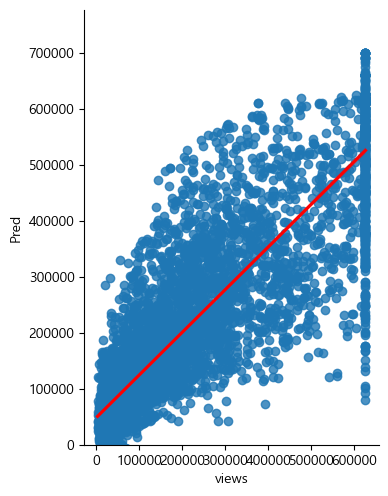

In [89]:
sns.pairplot(df_pred, x_vars=['views'], y_vars='Pred', height=5, aspect=0.8,kind = 'reg',plot_kws={'line_kws': {'color': 'red'}})
plt.ylim(bottom=0)

In [77]:
print('MAE-Error Absoluto Medio:', round(metrics.mean_absolute_error(y_test, Y_pred),2))
print('MSE-Error Cuadrático Medio:', round(metrics.mean_squared_error(y_test, Y_pred),2))
print('RMSE-Raiz del Error Cuadrático Medio:',round(np.sqrt(metrics.mean_squared_error(y_test, Y_pred)),2))

MAE-Error Absoluto Medio: 64761.95
MSE-Error Cuadrático Medio: 9111138310.21
RMSE-Raiz del Error Cuadrático Medio: 95452.28


In [78]:
print('R²-coeficiente de determinación: ',round(metrics.r2_score(y_test,Y_pred),2))

R²-coeficiente de determinación:  0.77


C:\Users\paite\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


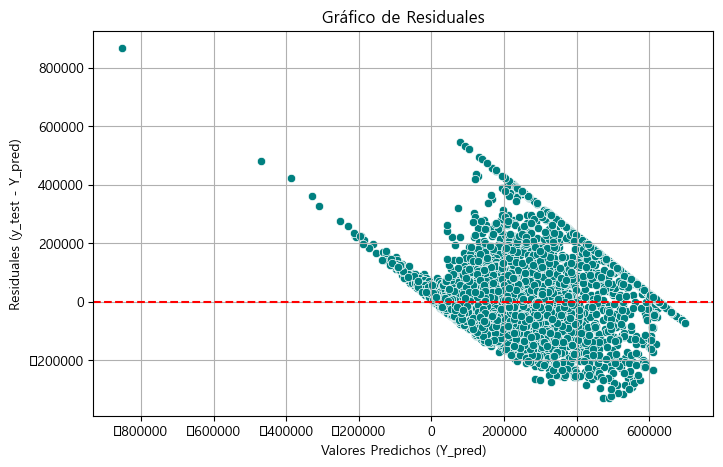

In [85]:
Y_pred = Y_pred.ravel()
y_test = y_test.values.ravel()
residuals = y_test - Y_pred


plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y_pred, y=residuals, color='teal')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuales')
plt.xlabel('Valores Predichos (Y_pred)')
plt.ylabel('Residuales (y_test - Y_pred)')
plt.grid(True)
plt.show()